**Assignment 1**:

Data Exploration, Pre-processing and Wrangling using Scikit Learn

1. Install Anaconda distribution for Python which is free and open source on your local computer (PC or Laptop). Go to the
Navigator and launch a Jupyter Notebook as we discussed in the class. Can alternatively utilize Google Colab for performing
the tasks mentioned.

2. Import pandas library for dealing with the data. Read data from the data.csv (given here in this assignment) containing
housing price data into a Panda’s DataFrame. Display how many rows are there in the file and its contents. Reading from the
file that is available locally can be done by using:
data = pd.read_csv(“<path for the data.csv file>”)

In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [236]:
file_path = '/content/housing.csv'


data = pd.read_csv(file_path)

num_rows = len(data)
print(f"Number of rows: {num_rows}")

data.head()


Number of rows: 20640


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


3. Display descriptive statistics by normally including those stats that summarize the central tendency, dispersion and shape of
a dataset’s distribution. Generate descriptive statistics using describe method on the pandas DataFrame. Display stats like
mean, median and standard deviation.

In [237]:
#Using describe function
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [238]:
#data.mean() => this will not work as the feature NEAR BAY is not numeric. instead:

numeric_data = data.select_dtypes(include='number');


In [239]:
#Means
numeric_data.mean()

,0
longitude,-119.569704
latitude,35.631861
housing_median_age,28.639486
total_rooms,2635.763081
total_bedrooms,537.870553
population,1425.476744
households,499.539680
median_income,3.870671
median_house_value,206855.816909


In [240]:
#Medians
numeric_data.median()

,0
longitude,-118.4900
latitude,34.2600
housing_median_age,29.0000
total_rooms,2127.0000
total_bedrooms,435.0000
population,1166.0000
households,409.0000
median_income,3.5348
median_house_value,179700.0000


In [241]:
#Standard Deviations
numeric_data.std()

,0
longitude,2.003532
latitude,2.135952
housing_median_age,12.585558
total_rooms,2181.615252
total_bedrooms,421.385070
population,1132.462122
households,382.329753
median_income,1.899822
median_house_value,115395.615874


In [242]:
#Alternative: using numeric_only = True on parent dataset itself.
data.mean(numeric_only=True)
data.median(numeric_only=True)
data.std(numeric_only=True)

,0
longitude,2.003532
latitude,2.135952
housing_median_age,12.585558
total_rooms,2181.615252
total_bedrooms,421.385070
population,1132.462122
households,382.329753
median_income,1.899822
median_house_value,115395.615874


4. Develop a Python code snippet that effectively visualizes the descriptive statistics of a given DataFrame. This should include
(min, max, mean, median, standard deviation).

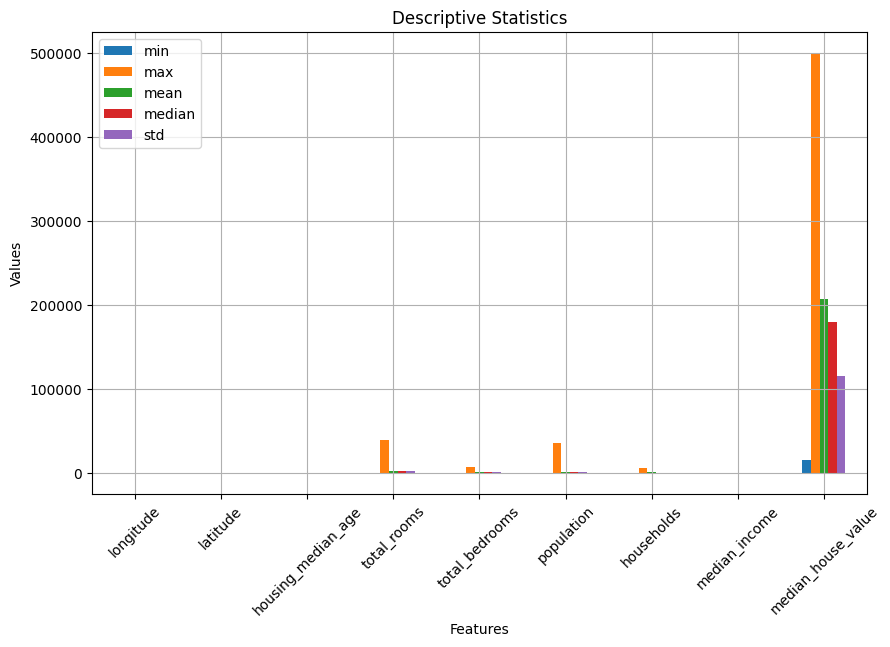

In [243]:

stats = pd.DataFrame({
    'min': numeric_data.min(),
    'max': numeric_data.max(),
    'mean': numeric_data.mean(),
    'median': numeric_data.median(),
    'std': numeric_data.std()
})


stats.plot(kind='bar', figsize=(10, 6))
plt.title("Descriptive Statistics")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid(True)
plt.show()

5. Find out the columns which have the missing values present in them and also identify the number of tuples which have these
missing values. Instead of removing these rows that have missing values in the given CSV file, impute Median of the values
of the respective columns by calling the median method on the respective attributes of the DataFrame. You could also impute
with mean or mode if you so wish.

In [244]:
#Displaying number of missing values for each column
data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [245]:
#Printing only that column names which has missing values along with no. of them
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

,0
total_bedrooms,207


In [246]:
#Number of rows with missing values
print("\nNumber of rows that has missing values is:",len(data[data.isnull().any(axis=1)]))


Number of rows that has missing values is: 207


In [247]:
#Imputing missing values with medians
#Note: pass numeric only inside median to avoid errors because of non-numeric data typed attributes.
before_data=data.copy()
data.fillna(data.median(numeric_only=True),inplace = True)

In [248]:
#Displaying number of missing values for each column
data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


6. To better understand the importance of imputing the mean/median/mode values to the given DataFrame, Plot the
distribution of the columns which have this missing values before and after filling in the missing values. (Try creating a
function for doing the task)

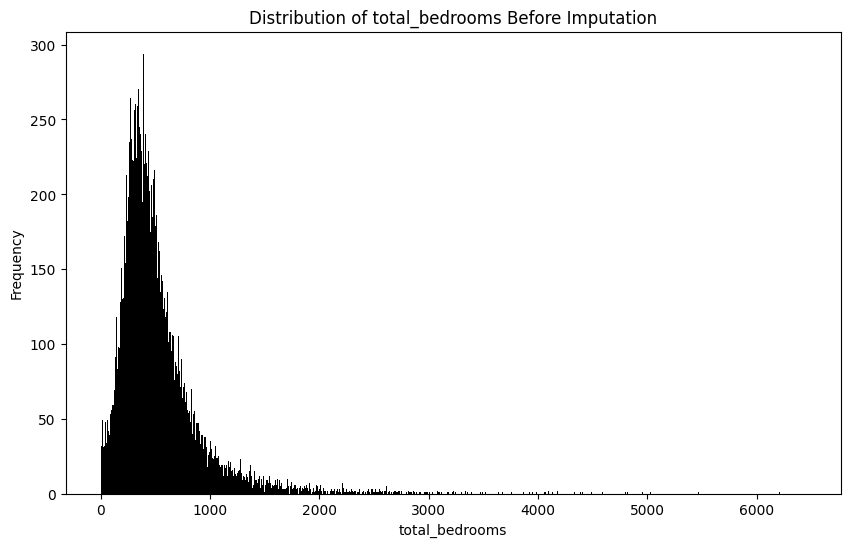

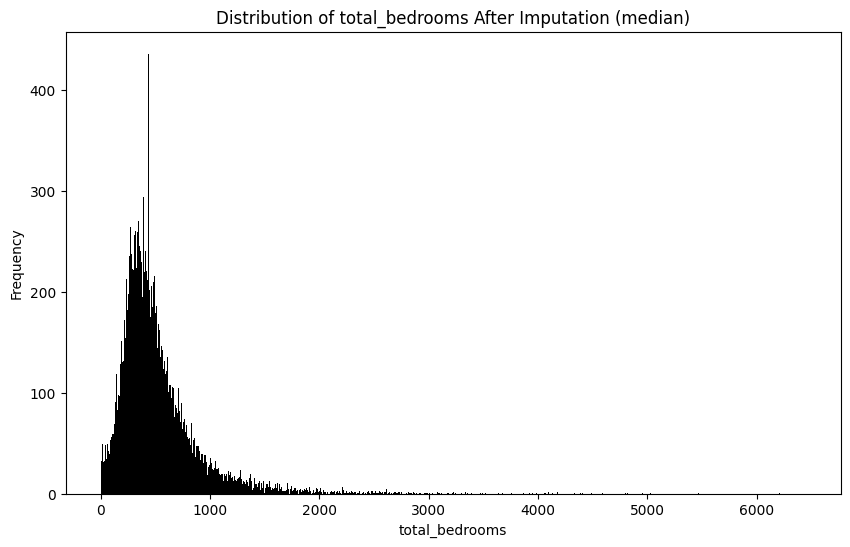

In [249]:

def plot_before_after_imputation(df, column, method):

    before_data = df[column].dropna()
    if method == 'mean':
        impute_value = df[column].mean()
    elif method == 'median':
        impute_value = df[column].median()
    elif method == 'mode':
        impute_value = df[column].mode()[0]
    else:
        raise ValueError("Method should be 'mean', 'median', or 'mode'")


    df_filled = df.copy()
    df_filled[column].fillna(impute_value, inplace=True)

    after_data = df_filled[column]

    # histogram before imputation
    plt.figure(figsize=(10, 6))
    plt.hist(before_data, bins=1000, color='black')
    plt.title(f'Distribution of {column} Before Imputation')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    # histogram after imputation
    plt.figure(figsize=(10, 6))
    plt.hist(after_data, bins=1000, color='black')
    plt.title(f'Distribution of {column} After Imputation ({method})')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

#calling the above function
plot_before_after_imputation(before_data, 'total_bedrooms', method='median')


In [250]:
# The main difference between above two is that peak, which signifies 207 null values being imputed with median.

7. Some rows in the CSV file might have duplicates. If so, remove those duplicates by calling drop_duplicates method on the
DataFrame.

In [251]:
duplicates = data[data.duplicated()]
duplicates

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [252]:
# As the duplicates dataframe is empty, there are no duplicated rows in the dataset.

8. Use Matplotlib to create a Python code snippet to generate a scatter plot visualizing the relationship between longitude and
latitude, with the color of each data point representing the corresponding median house value

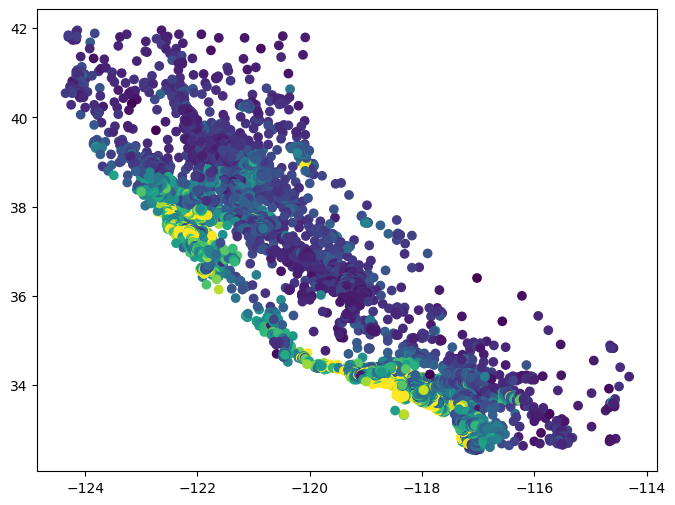

In [253]:
plt.figure(figsize=(8, 6))
plt.scatter(data['longitude'] , data['latitude'] , c = data['median_house_value'])

Optional: - (Enhance the
plot's aesthetics by setting the figure size, adding a colorbar, labeling axes, and providing a descriptive title).


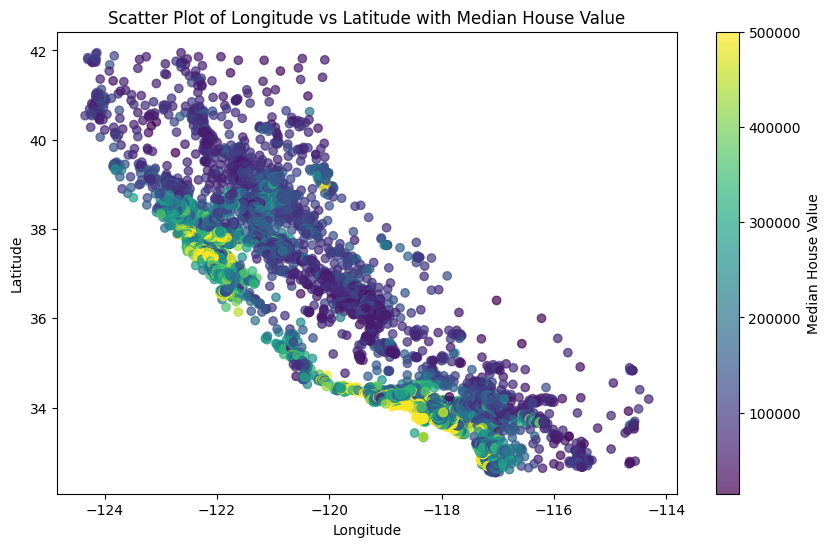

In [254]:


plt.figure(figsize=(10, 6))
sc = plt.scatter(data['longitude'], data['latitude'], c=data['median_house_value'], cmap='viridis', alpha=0.7)


plt.colorbar(sc, label='Median House Value')


plt.title('Scatter Plot of Longitude vs Latitude with Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')


plt.show()


9. Now try making out some observations out of specific columns in the DataFrame and plot them either in form of numerical
observations or as a plot showing the observations you made.



    9.1  Analyzing the relationship between Median Income and Median House Value




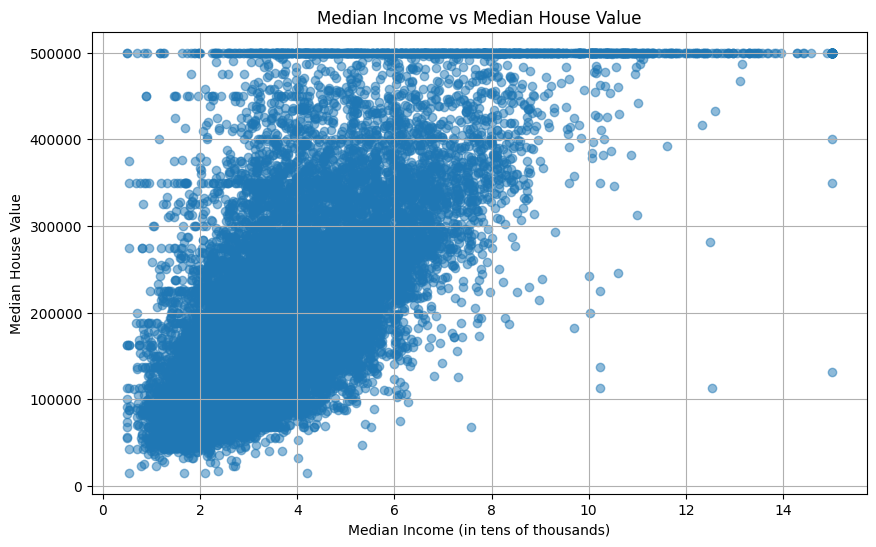

In [255]:

plt.figure(figsize=(10, 6))
plt.scatter(data['median_income'], data['median_house_value'], alpha=0.5)


plt.title('Median Income vs Median House Value')
plt.xlabel('Median Income (in tens of thousands)')
plt.ylabel('Median House Value')
plt.grid(True)


plt.show()



    9.2 Identifying High-Value Areas Near the Ocean




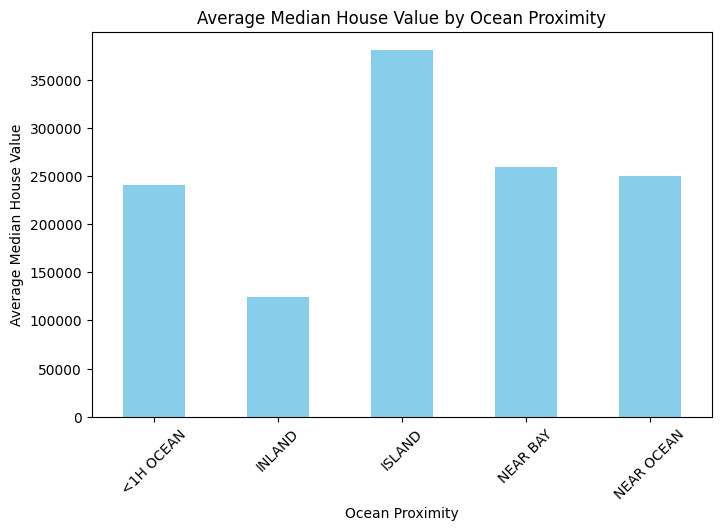

In [256]:
ocean_value_means = data.groupby('ocean_proximity')['median_house_value'].mean()

ocean_value_means.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title('Average Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Average Median House Value')
plt.xticks(rotation=45)
plt.show()




    9.3 Distribution of Houses Based on Age




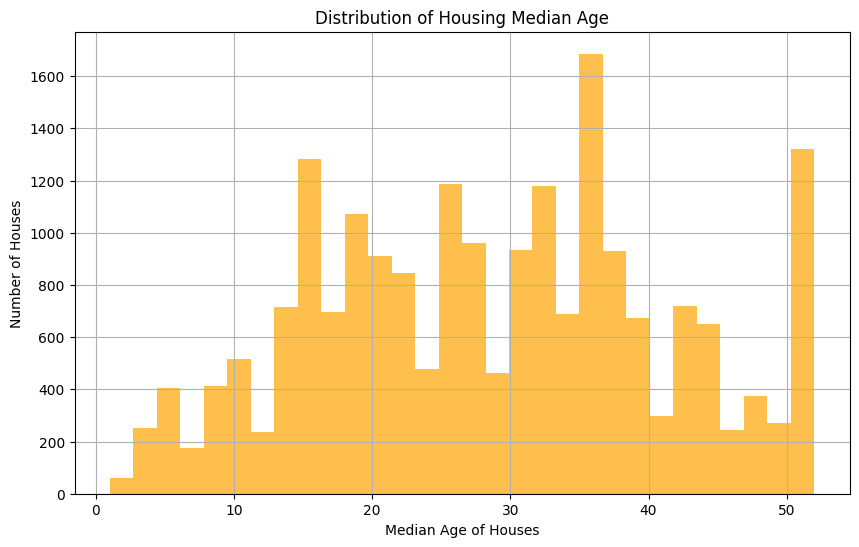

In [257]:

plt.figure(figsize=(10, 6))
plt.hist(data['housing_median_age'], bins=30, color='orange', alpha=0.7)
plt.title('Distribution of Housing Median Age')
plt.xlabel('Median Age of Houses')
plt.ylabel('Number of Houses')
plt.grid(True)
plt.show()


10. Analyze the relationship between ocean_proximity and other numerical features within the DataFrame.

In [258]:
grouped = data.groupby('ocean_proximity')
summary_stats = grouped.describe()
summary_stats

longitude                                                 \
                    count        mean       std     min     25%      50%   
ocean_proximity                                                            
<1H OCEAN          9136.0 -118.847766  1.588888 -124.14 -118.50 -118.275   
INLAND             6551.0 -119.732990  1.900950 -123.73 -121.35 -120.000   
ISLAND                5.0 -118.354000  0.070569 -118.48 -118.33 -118.320   
NEAR BAY           2290.0 -122.260694  0.147004 -122.59 -122.41 -122.250   
NEAR OCEAN         2658.0 -119.332555  2.327307 -124.35 -122.02 -118.260   

                                  latitude             ... median_income  \
                      75%     max    count       mean  ...           75%   
ocean_proximity                                        ...                 
<1H OCEAN       -118.0000 -116.62   9136.0  34.560577  ...      5.180500   
INLAND          -117.8400 -114.31   6551.0  36.731829  ...      3.961500   
ISLAND          -118.3200 -118.32      5.0  33.358000  ...      2.833300   
NEAR BAY        -122.1400 -122.01   2290.0  37.801057  ...      5.054425   
NEAR OCEAN      -117.1825 -116.97   2658.0  34.738439  ...      4.837400   

                         median_house_value                                \
                     max              count           mean            std   
ocean_proximity                                                             
<1H OCEAN        15.0001             9136.0  240084.285464  106124.292213   
INLAND           15.0001             6551.0  124805.392001   70007.908494   
ISLAND            3.3906                5.0  380440.000000   80559.561816   
NEAR BAY         15.0001             2290.0  259212.311790  122818.537064   
NEAR OCEAN       15.0001             2658.0  249433.977427  122477.145927   

                                                                   
                      min       25%       50%       75%       max  
ocean_proximity                                                    
<1H OCEAN         17500.0  164100.0  214850.0  289100.0  500001.0  
INLAND            14999.0   77500.0  108500.0  148950.0  500001.0  
ISLAND           287500.0  300000.0  414700.0  450000.0  450000.0  
NEAR BAY          22500.0  162500.0  233800.0  345700.0  500001.0  
NEAR OCEAN        22500.0  150000.0  229450.0  322750.0  500001.0  

[5 rows x 72 columns]

Relationship betweeen ocean_proximity and other numerical features from the dataset



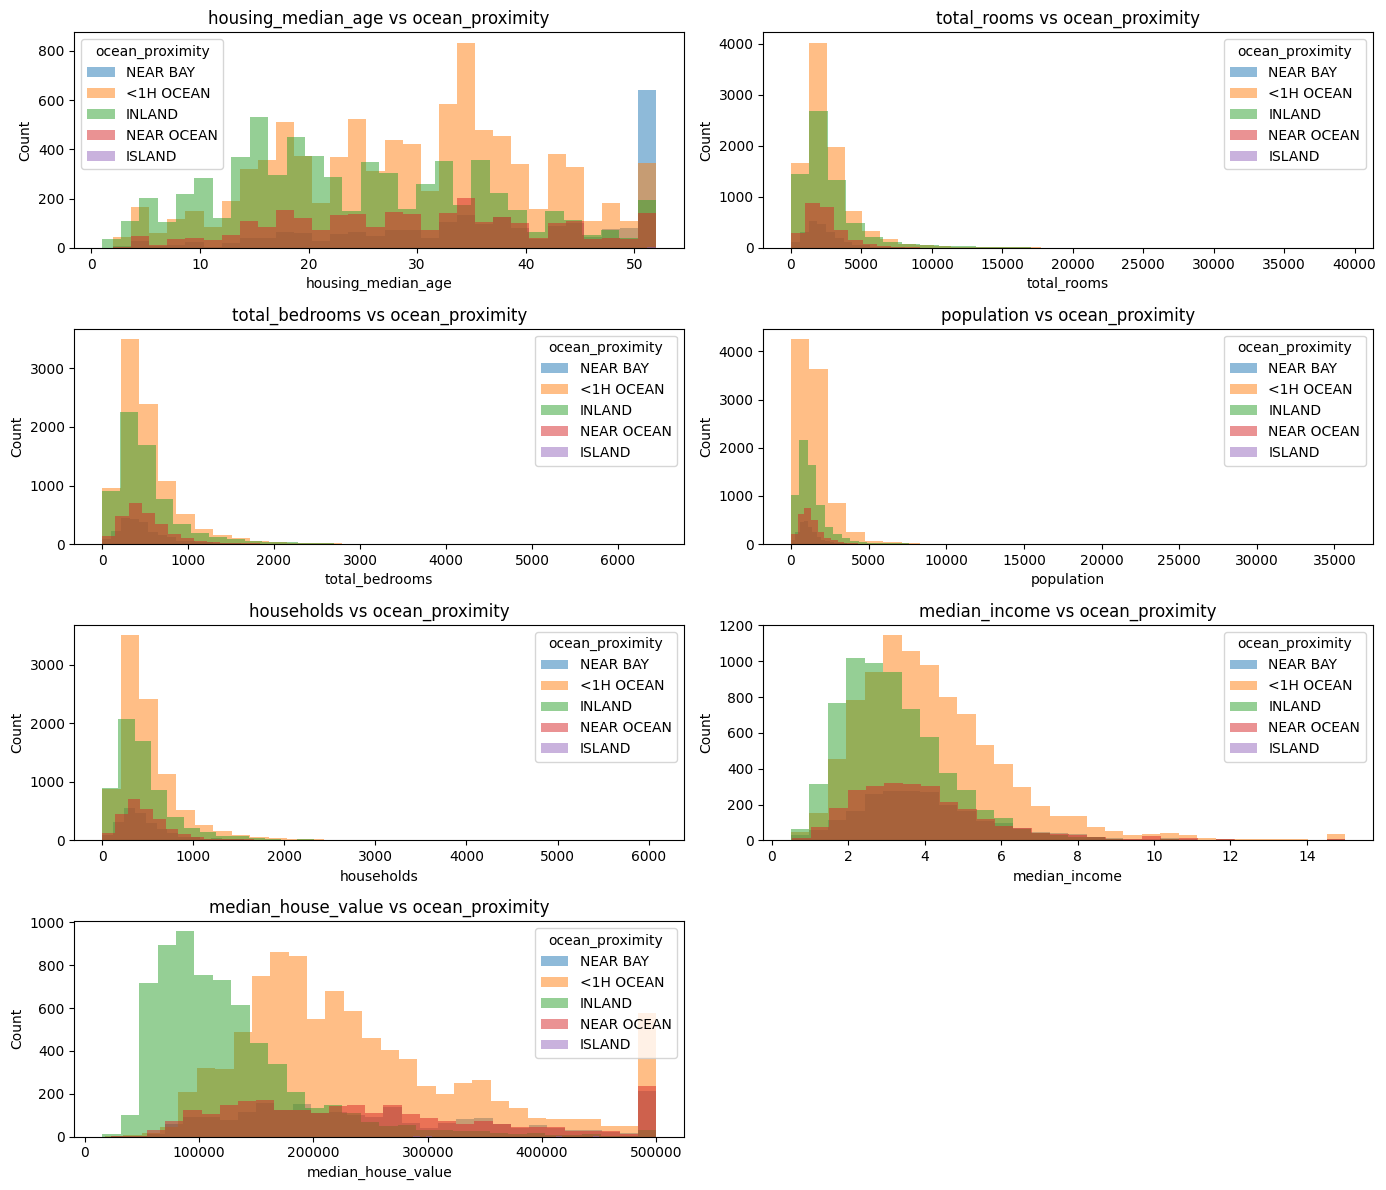

In [259]:

numerical_features = ['housing_median_age', 'total_rooms', 'total_bedrooms',
                      'population', 'households', 'median_income', 'median_house_value']

categories = data['ocean_proximity'].unique()

plt.figure(figsize=(14, 12))

for i, feature in enumerate(numerical_features):
    plt.subplot(4, 2, i+1)

    for category in categories:
        subset = data[data['ocean_proximity'] == category]
        plt.hist(subset[feature], bins=30, alpha=0.5, label=category)

    plt.title(f'{feature} vs ocean_proximity')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='ocean_proximity')

plt.tight_layout()
plt.show()

Label encoding the ocean_proximity feature

In [260]:
le = LabelEncoder()
data['ocean_proximity_encoded'] = le.fit_transform(data['ocean_proximity'])

11. After performing the label encoding of the ocean_proximity feature: -

a) Creating a Correlation Heatmap

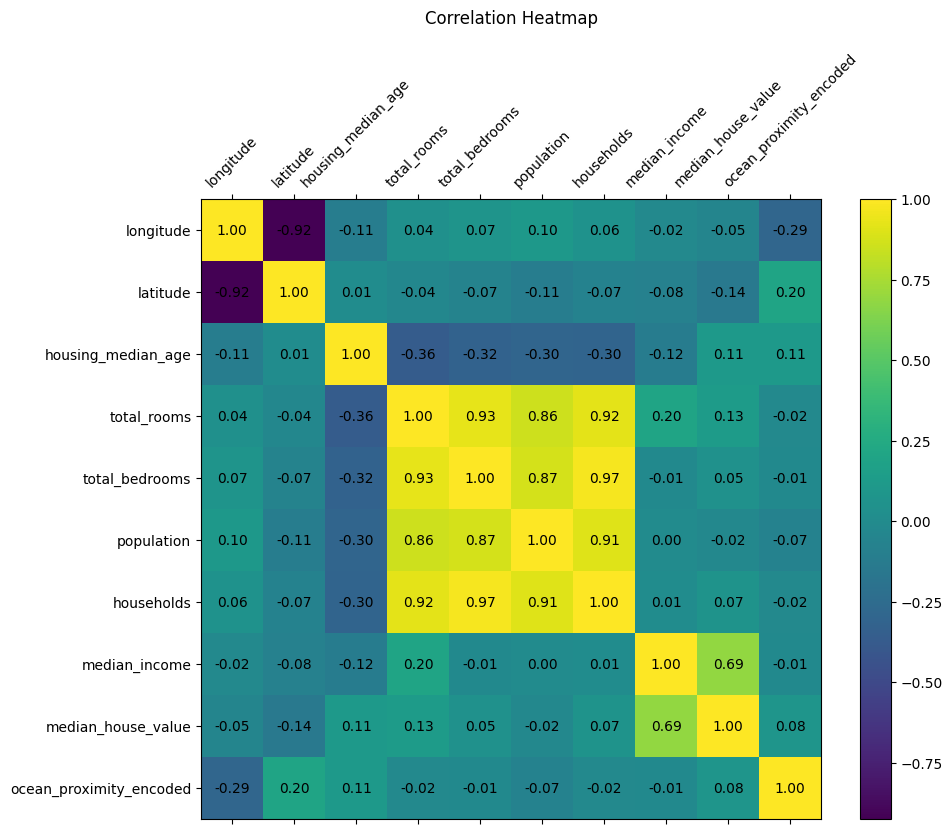

In [261]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, fignum=1)
plt.colorbar()

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Heatmap', pad=20)
plt.show()


b) Generating Box Plots for All Numerical Features

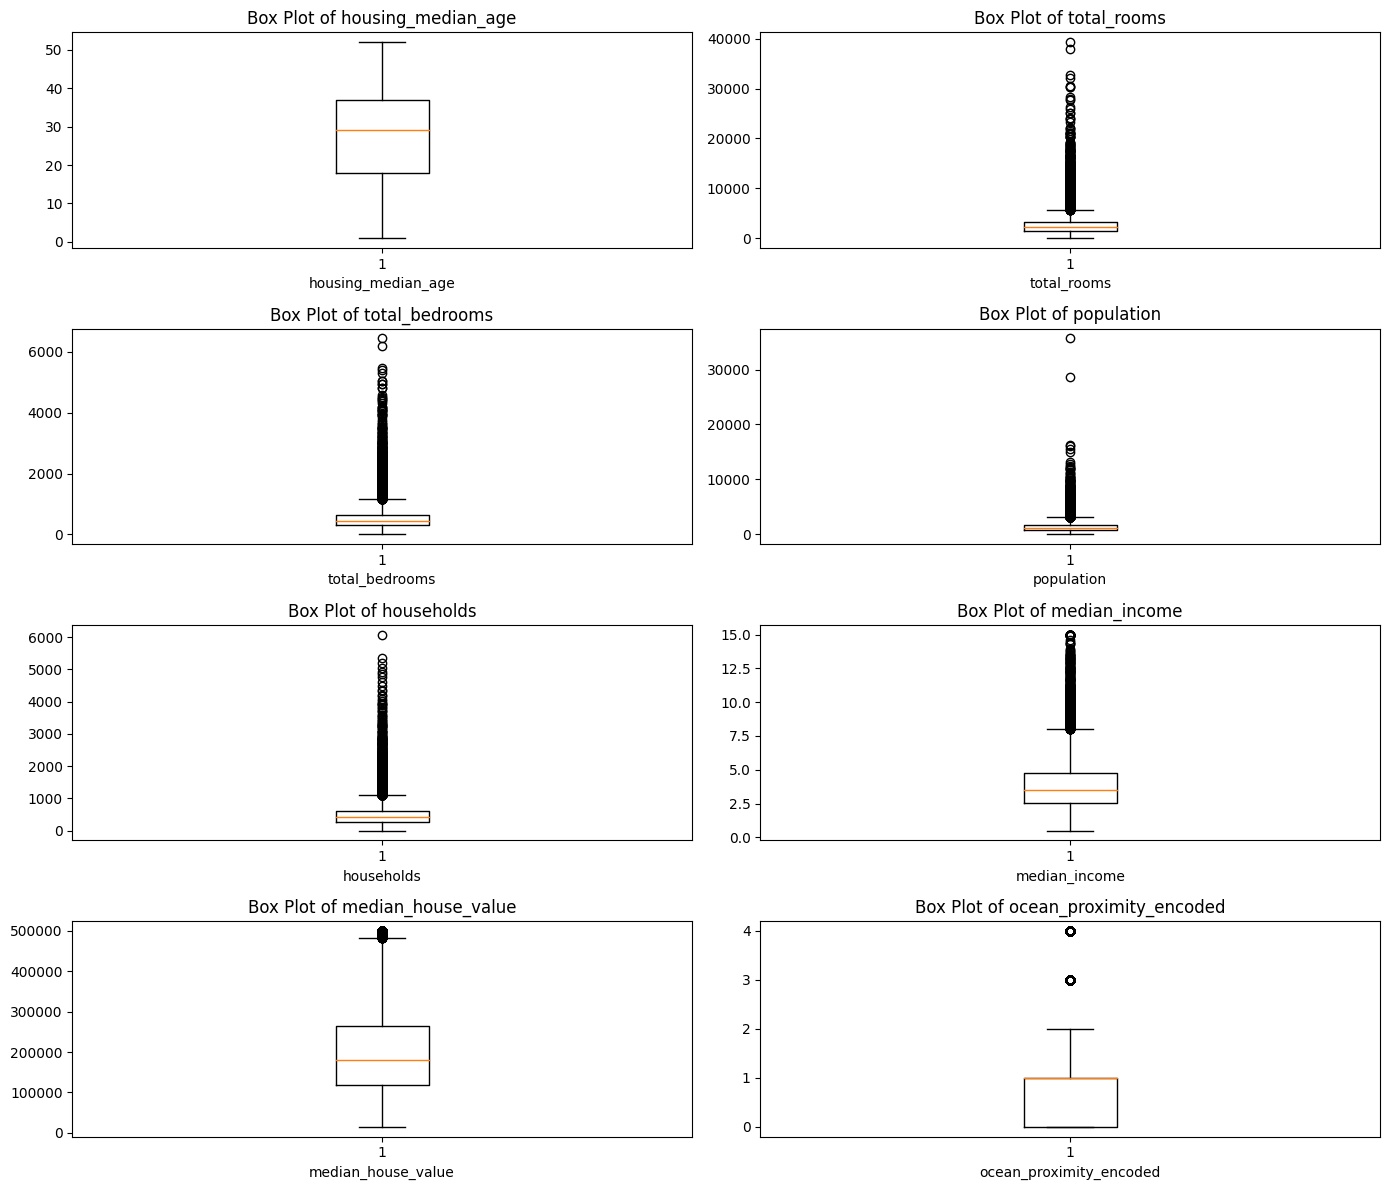

In [262]:
numerical_features = ['housing_median_age', 'total_rooms', 'total_bedrooms',
                      'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity_encoded']

plt.figure(figsize=(14, 12))

for i, feature in enumerate(numerical_features):
    plt.subplot(4, 2, i+1)
    plt.boxplot(data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


c) Analyze the heatmap and box plots for all the features to draw insights about the dataset, such as: \
i) Strong correlations between features \
ii) Presence of outliers in the numerical data \
iii) Potential feature importance based on their distribution \

i)
* A correlation coefficient of 0.69 indicates a strong positive relationship between median household income and median house value. As household income increases, the median house value tends to rise as well.
* A correlation coefficient of 0.97 indicates a very strong positive relationship between the number of households and the number of bedrooms.This strong correlation is intuitive because more households generally imply more housing units, and hence, more bedrooms.
* A correlation coefficient of -0.32 indicates a moderate negative relationship between the median age of the housing and the total number of rooms. This suggests that as the age of the housing increases, the total number of rooms tends to decrease slightly

ii)  There are significant outliers in median_income,households,population,total rooms and total bedrooms

iii)  Median income is the most important feature among the potential features. These are crucial for determining the house value.

d) Identify and visualize characteristics of premium houses based on ocean proximity, cost per square foot, and median
income. (Plot a Box-Plot for doing so)

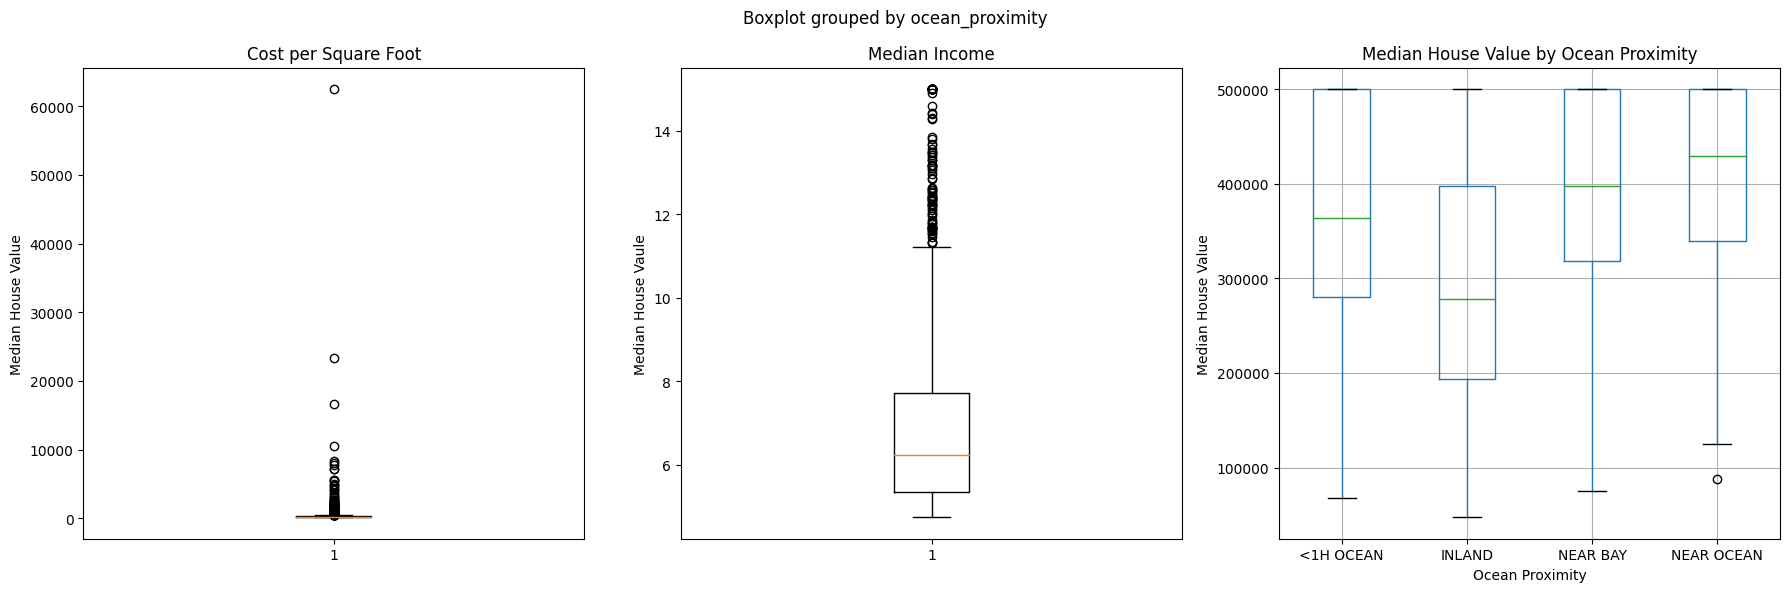

In [263]:
data['cost_per_sqft'] = data['median_house_value'] / data['total_rooms']

premium_houses = data[(data['cost_per_sqft'] > data['cost_per_sqft'].quantile(0.75)) &
                      (data['median_income'] > data['median_income'].quantile(0.75))]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Box plot for Cost per Square Foot
axes[0].boxplot(premium_houses['cost_per_sqft'])
axes[0].set_title('Cost per Square Foot')
axes[0].set_ylabel('Median House Value')

# Box plot for Median Income

axes[1].boxplot(premium_houses['median_income'])
axes[1].set_title('Median Income')
axes[1].set_ylabel('Median House Vaule')

# Box plot for Ocean Proximity (Encoded)
premium_houses.boxplot(column='median_house_value', by='ocean_proximity', ax=axes[2])
axes[2].set_title('Median House Value by Ocean Proximity')
axes[2].set_xlabel('Ocean Proximity')
axes[2].set_ylabel('Median House Value')

plt.tight_layout()
plt.show()

12. Develop a Python function to visualize the distribution and relationship of a specified numerical column within a dataset.
Create a figure with three subplots: Plot the Kernel Density Estimate (KDE) of the column in the first subplot, plot a boxplot
of the column in the second subplot, and plot a scatterplot of the column against 'median_house_value' in the third subplot.

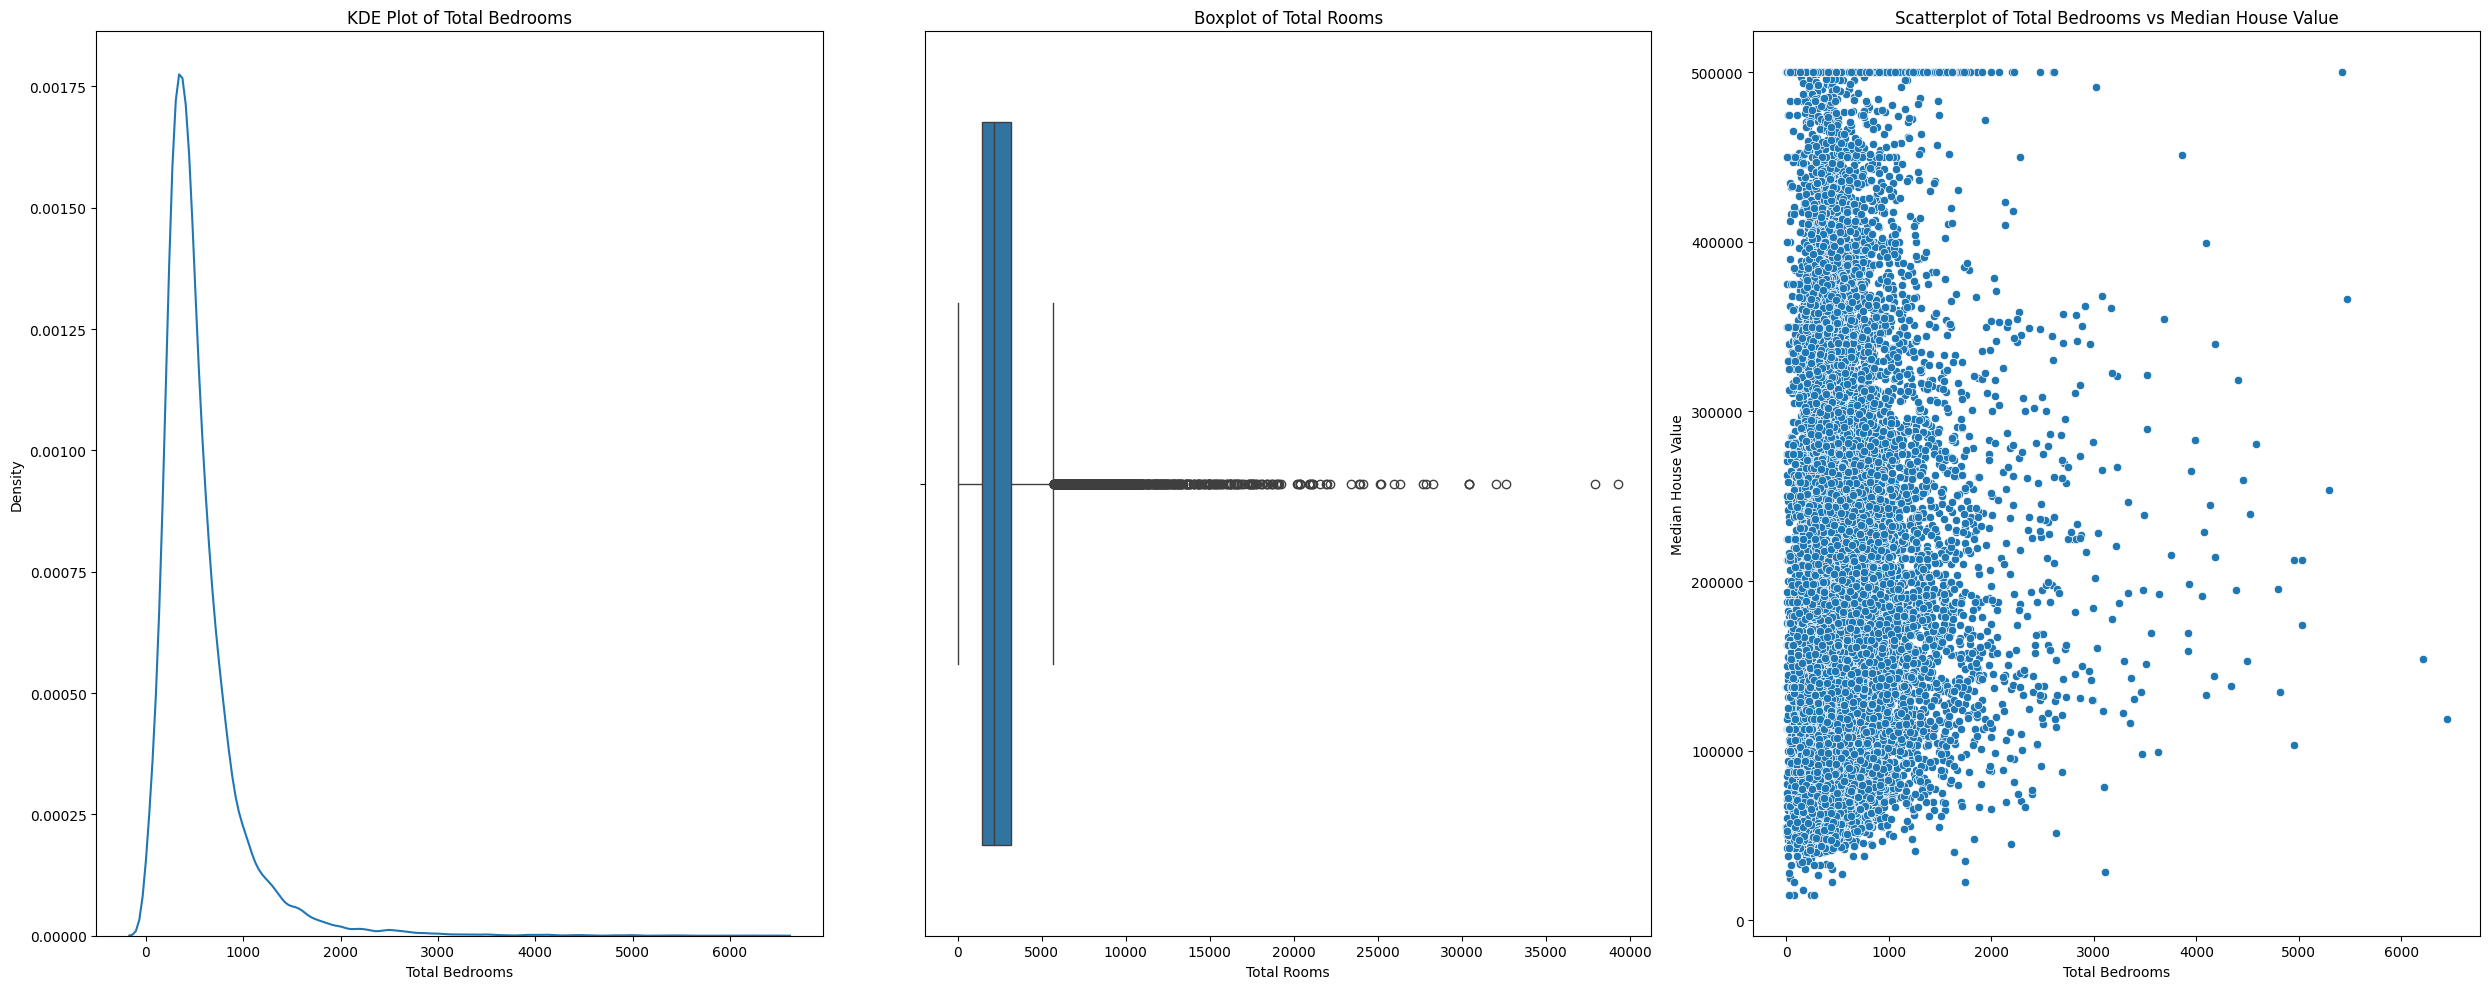

In [264]:
def plot_housing_data(data):
    fig, axes = plt.subplots(1, 3, figsize=(25, 10))

    # KDE Plot of total_bedrooms
    sns.kdeplot(data['total_bedrooms'], ax=axes[0])
    axes[0].set_title('KDE Plot of Total Bedrooms')
    axes[0].set_xlabel('Total Bedrooms')

    # Boxplot of total_rooms
    sns.boxplot(x=data['total_rooms'], ax=axes[1])
    axes[1].set_title('Boxplot of Total Rooms')
    axes[1].set_xlabel('Total Rooms')

    # Scatter plot of total_bedrooms vs median_house_value
    sns.scatterplot(x=data['total_bedrooms'], y=data['median_house_value'], ax=axes[2])
    axes[2].set_title('Scatterplot of Total Bedrooms vs Median House Value')
    axes[2].set_xlabel('Total Bedrooms')
    axes[2].set_ylabel('Median House Value')

    plt.tight_layout()
    plt.show()

plot_housing_data(data)

13. Identify and visualize outliers in a numerical column of a dataset based on standard deviation.

* Assuming a normal distribution, calculate the lower and upper bounds for data points within approximately 95% of
the data using two standard deviations from the mean.
* Identify data points that fall outside these bounds as outliers.
* Calculate the total number of outliers.
* Visually represent the data distribution, highlighting the outlier regions.

In [265]:
mean=data['median_house_value'].mean()
std=data['median_house_value'].std()
lb=mean-2*std
ub=mean+2*std
print(f"Lower bound is {lb}")
print(f"Upper bound is {ub}")

Lower bound is -23935.41483991299
Upper bound is 437647.04865774245


In [266]:
outliers=data[(data['median_house_value']<lb) | (data['median_house_value']>ub)]
print(f'Total Outliers are {outliers.shape[0]}')

Total Outliers are 1383


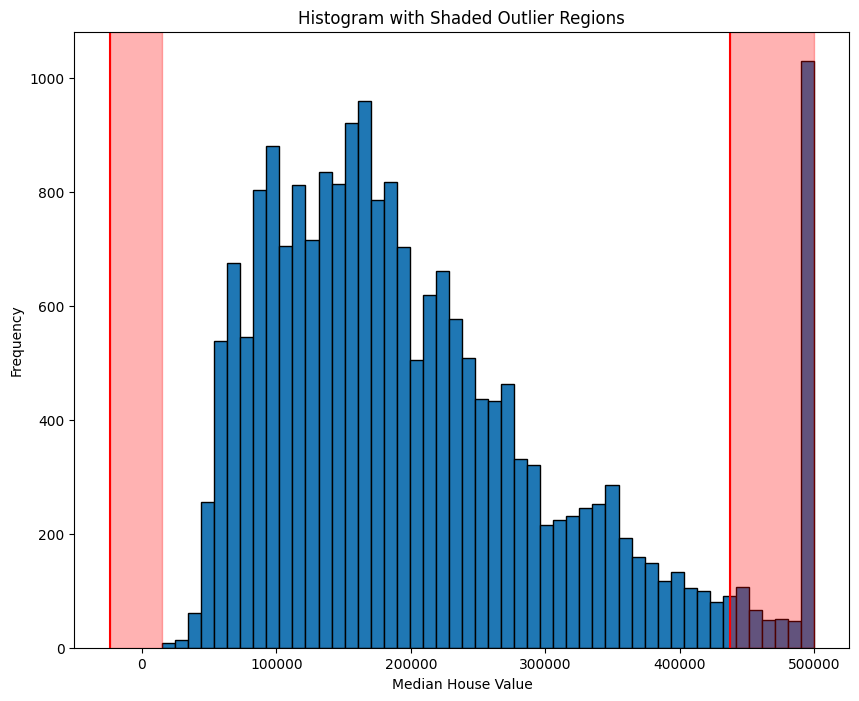

In [267]:
plt.figure(figsize=(10,8))
plt.hist(data['median_house_value'],bins=50,edgecolor='black')
plt.axvline(lb,color='red')
plt.axvline(ub,color='red')
plt.axvspan(xmin=ub, xmax=data['median_house_value'].max(), color='red', alpha=0.3)
plt.axvspan(xmin=data['median_house_value'].min(),xmax=lb, color='red', alpha=0.3)
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Histogram with Shaded Outlier Regions')
plt.show()

14. Perform feature scaling on the given DataFrame using StandardScaler and MinMaxScaler from Scikit-learn.
* Apply both scaling techniques to the numerical features of the DataFrame.
* Compare the resulting ranges of the scaled data for both methods.
* Explore the potential benefits and drawbacks of each scaling technique in the context of the given dataset. (Just
know what each scaling technique actually does and how are they different from one another)
*
Investigate additional scaling methods commonly employed in practice, such as RobustScaler, QuantileScaler, and
PowerTransformer.
*
Justify and analyze the selection of these alternative scaling methods based on their theoretical underpinnings and
potential advantages over StandardScaler and MinMaxScaler.

      Splitting the Data into Features (X) and Target (y)

In [273]:
X = data.drop(['median_house_value','ocean_proximity'], axis=1).values
y = data['median_house_value'].values


      Scaling with MinMaxScaler and StandardScaler

In [274]:
mm_scaler = MinMaxScaler()
s_scaler = StandardScaler()

X_mm = mm_scaler.fit_transform(X)
X_s = s_scaler.fit_transform(X)

        Comparing the Resulting Ranges of the Scaled Data

In [279]:
X_mm_df = pd.DataFrame(X_mm, columns=data.drop(['ocean_proximity_encoded','ocean_proximity'], axis=1).columns)
X_s_df = pd.DataFrame(X_s, columns=data.drop(['ocean_proximity_encoded','ocean_proximity'], axis=1).columns)

print("MinMaxScaler:")
X_mm_df.describe().loc[['min', 'max']]



MinMaxScaler:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,cost_per_sqft
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [280]:
print("\nStandardScaler:")
X_s_df.describe().loc[['min', 'max']]


StandardScaler:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,cost_per_sqft
min,-2.385992,-1.447568,-2.196180,-1.207283,-1.277688,-1.256123,-1.303984,-1.774299,-0.820653,-0.183837
max,2.625280,2.958068,1.856182,16.815580,14.087789,30.250330,14.601520,5.858286,1.995003,82.030476


MinMaxScaler
- Purpose: Scales features to a range, typically [0, 1].
- Pros: Preserves feature relationships; useful for models requiring normalized input.
- Cons: Sensitive to outliers.

StandardScaler
- Purpose:Standardizes features by removing the mean and scaling to unit variance.
- Pros: Effective for Gaussian-distributed data; beneficial for PCA and clustering.
- Cons: Does not bound data within a fixed range.

RobustScaler
- Purpose: Scales using median and interquartile range, making it robust to outliers.
- Pros: Ideal for datasets with outliers.
- Cons: Less effective if data lacks significant outliers.

QuantileTransformer
- Purpose: Transforms features to follow a uniform or normal distribution.
- Pros: Makes data more Gaussian-like, useful for linear models.
- Cons: Can distort relationships between features if overused.

PowerTransformer
- Purpose: Applies a power transformation to reduce skewness and stabilize variance.
- Pros: Useful for skewed data to make it more Gaussian.
- Cons: May be unnecessary for already normal data.
